# Setup
### Imports, wipe working directories, reload .py scripts

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib, os

from lib import path_tools as pt
from lib import import_data

%matplotlib inline

In [3]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "uvvis"

In [4]:
importlib.reload(import_data);

In [5]:
# Identify the folder(s) where the raw, original data is
# Use a dict to store multiple directories that you want ready to plot
uv_data = {}
samples_dir = {
    "etb068": "200122 ETB-068 CsAgBiBr/",
}

for run_ID in samples_dir.keys():
    uv_data[run_ID] = import_data.init(flag, samples_dir[run_ID])


Creating new local data folder.


In [14]:
# Expression to find where index = X nm for normalizing later
uv_data["etb044"]['1min'].index[uv_data["etb044"]['1min']['wavelength'] == 550]

Int64Index([250], dtype='int64')

Text(0.5, 1.0, 'Cs$_2$AgBiBr$_6$ UV-Vis Absorbance')

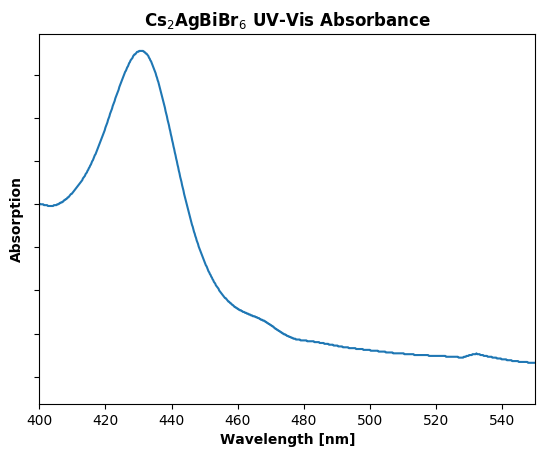

In [14]:
fig = plt.figure(1)
fig_ax = plt.gca()

plotted = None
localmax = 0
# Comment out any undersired samples
master_cypher = (
    "10min 110C",
)

# PUT THIS IN MAIN.PY LATER
# def sortsamples

for sample_ID in master_cypher:
    
    for run_ID in samples_dir.keys():
        if sample_ID in uv_data[run_ID].keys() and plotted != True:
            
            localmax = uv_data[run_ID][sample_ID]["abs"].loc[50:120].max()
            
            plt.figure(1)
            plt.plot(uv_data[run_ID][sample_ID]["wavelength"], uv_data[run_ID][sample_ID]["abs"],
#                      localmax,
                     label=sample_ID.replace("min", " min"))
            
            plotted = True
            localmax = 0
        else:
            pass
    
    plotted = False

plt.style.use('default')

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Absorption", weight="semibold")
fig_ax.set_yticklabels([])
# plt.xlim(min(uv_data["etb068"]["10min 110C"]["wavelength"]), max(uv_data["etb068"]["10min 110C"]["wavelength"]))
plt.xlim(400, 550)

plt.title("Cs$_2$AgBiBr$_6$ UV-Vis Absorbance",weight="semibold")
# plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)

In [28]:
uv_data["etb045"]["4min"]["abs"].loc[50:120].max()

0.11800000000000001

In [15]:
fig.savefig("plots/200122/csagbibr.png", dpi=200, format='png', bbox_inches='tight')

# XRD

In [3]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [4]:
importlib.reload(import_data)

<module 'lib.import_data' from '/home/tomas/Documents/sciencetools_py/lib/import_data.py'>

In [5]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
XRD_data = {}

# ETB-046 Variables
samples_dir = {
    "etb068": "200120 ETB-068 CsAgBiBr on glass/",
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.


Text(0.5, 1.0, 'Cs$_2$AgBiBr$_6$ XRD')

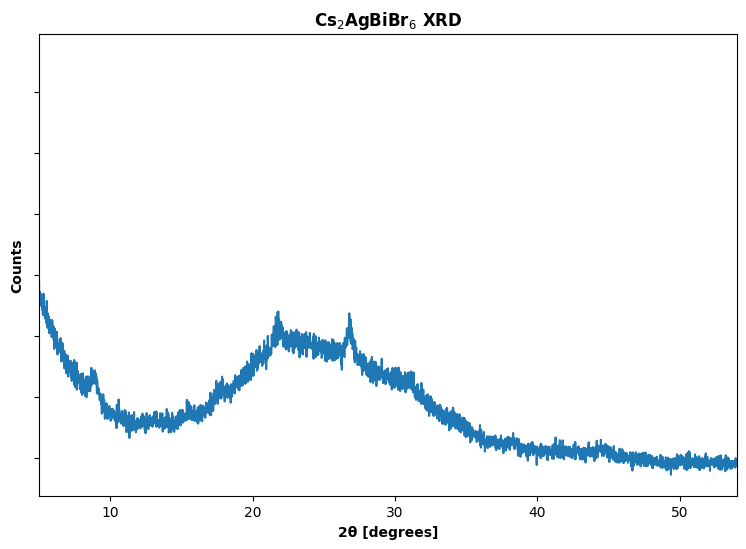

In [10]:
fig = plt.figure(1, figsize=[9, 6])
fig_ax = plt.gca()

offset = 0
master_cypher = (
    "10min 110C RESCAN",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
                
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], XRD_data[run_ID][sample_ID]["counts"],
                     label=lbl)
            
            offset += samplemax
            
plt.style.use('default')

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Counts", weight="semibold")
fig_ax.set_yticklabels([])
plt.xlim(5, max(XRD_data["etb068"]["10min 110C RESCAN"]["2theta"]))

plt.title("Cs$_2$AgBiBr$_6$ XRD",weight="semibold")
# plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)

In [11]:
fig.savefig("plots/200122/CsAgBiBr_XRD_RESCAN.png", dpi=200, format='png', bbox_inches='tight')